# Credit Card Fraud Detection





In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

### Data Understanding
The Dataset we use is the Kaggle Credit Card Fraud Detection Dataset enlisted in the following link: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Link</a>


In [2]:
# Read Data into a Dataframe
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79313,57966,-0.527571,-3.483241,-0.206444,-0.583181,-2.067419,-0.129826,0.454118,-0.149176,1.863281,...,0.691203,0.224470,-0.875993,0.204226,0.079542,0.029189,-0.109220,0.178251,912.79,0.0
79314,57966,-0.541422,1.341092,0.576882,0.733835,0.259657,-0.233639,0.712069,0.190731,-1.067355,...,0.189997,0.493842,-0.141807,-0.406546,-0.043605,-0.287510,0.045194,0.100293,49.33,0.0
79315,57966,-0.830218,0.971781,0.974916,-1.348723,-0.230572,-0.778253,0.395464,0.109896,0.234581,...,-0.115767,-0.335950,-0.068152,-0.109514,-0.204347,0.703500,-0.383530,-0.223780,14.60,0.0
79316,57966,1.104838,-1.141651,0.942113,-0.661271,-1.591229,-0.056758,-1.192570,0.275125,-0.447900,...,0.508825,1.146845,-0.117753,0.241582,0.212189,-0.054096,0.023744,0.026206,99.00,0.0


### Data Preparation



In [4]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,...,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000
mean,37153.438249,-0.257426,-0.035576,0.678119,0.164591,-0.275998,0.095774,-0.114545,0.053468,-0.007344,...,-0.028990,-0.105797,-0.037871,0.007637,0.134631,0.026317,0.002125,0.002664,97.766923,0.002408
std,15151.789910,1.890179,1.681418,1.388884,1.369498,1.384464,1.305428,1.249211,1.234847,1.145285,...,0.740237,0.636321,0.629529,0.595742,0.440672,0.498252,0.390983,0.331492,269.644636,0.049013
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,30583.500000,-1.018001,-0.599132,0.187124,-0.724773,-0.894735,-0.642179,-0.604487,-0.141071,-0.684907,...,-0.224304,-0.524347,-0.178349,-0.323412,-0.129002,-0.326882,-0.063297,-0.005828,7.680000,0.000000
50%,39915.500000,-0.249380,0.069290,0.764923,0.183706,-0.308987,-0.153593,-0.073958,0.069131,-0.087263,...,-0.058679,-0.080550,-0.050441,0.063991,0.172875,-0.072550,0.009300,0.022860,26.900000,0.000000
75%,48863.000000,1.153594,0.722599,1.394720,1.045422,0.259201,0.490147,0.416184,0.349133,0.627928,...,0.117433,0.309236,0.080476,0.405157,0.421703,0.307988,0.082442,0.075999,89.150000,0.000000
max,57967.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [12]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

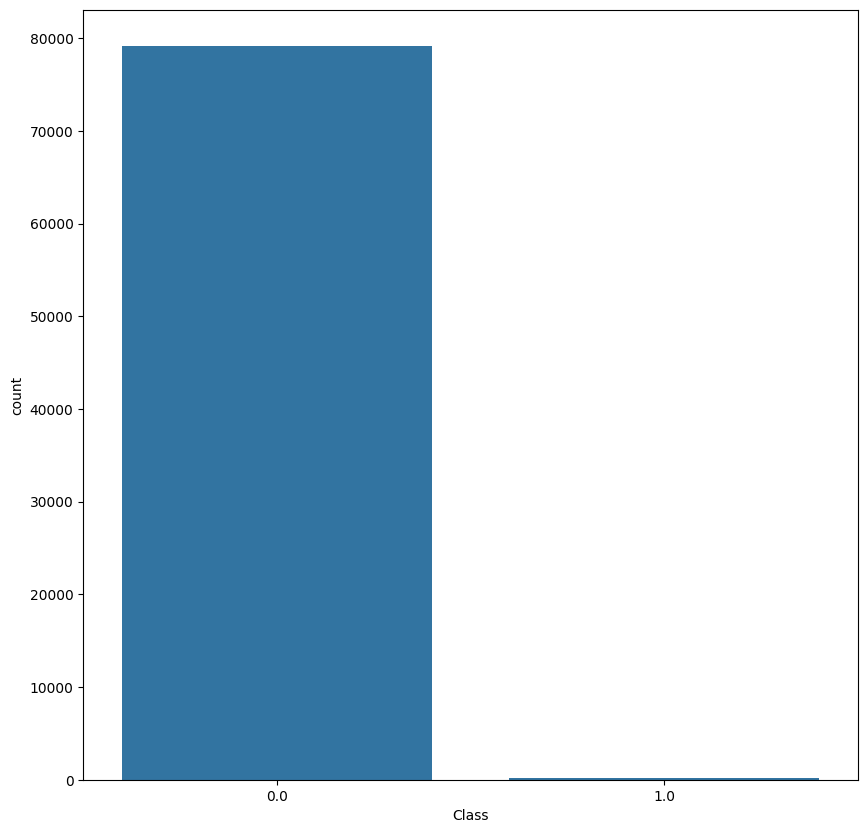

In [8]:
countplot_data(df, df.Class)

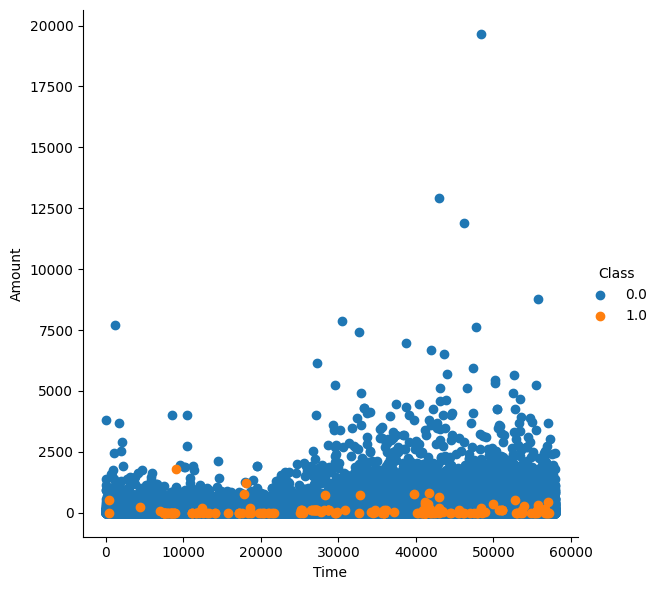

In [13]:
pairplot_data_grid(df, "Time", "Amount", "Class")

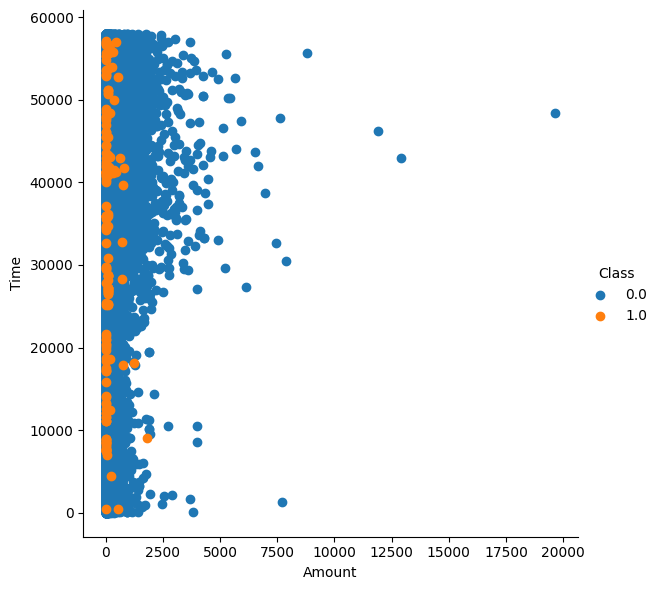

In [14]:
pairplot_data_grid(df, "Amount", "Time", "Class")

In [18]:
df_refine = df[["Time", "Amount", "Class"]]
amount_more = 0
amount_less = 0
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)


150
79168


In [19]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.81088781865402

In [20]:
fraud = 0
legitimate = 1
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"]<2500):
        if(df_refine.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

191
78978


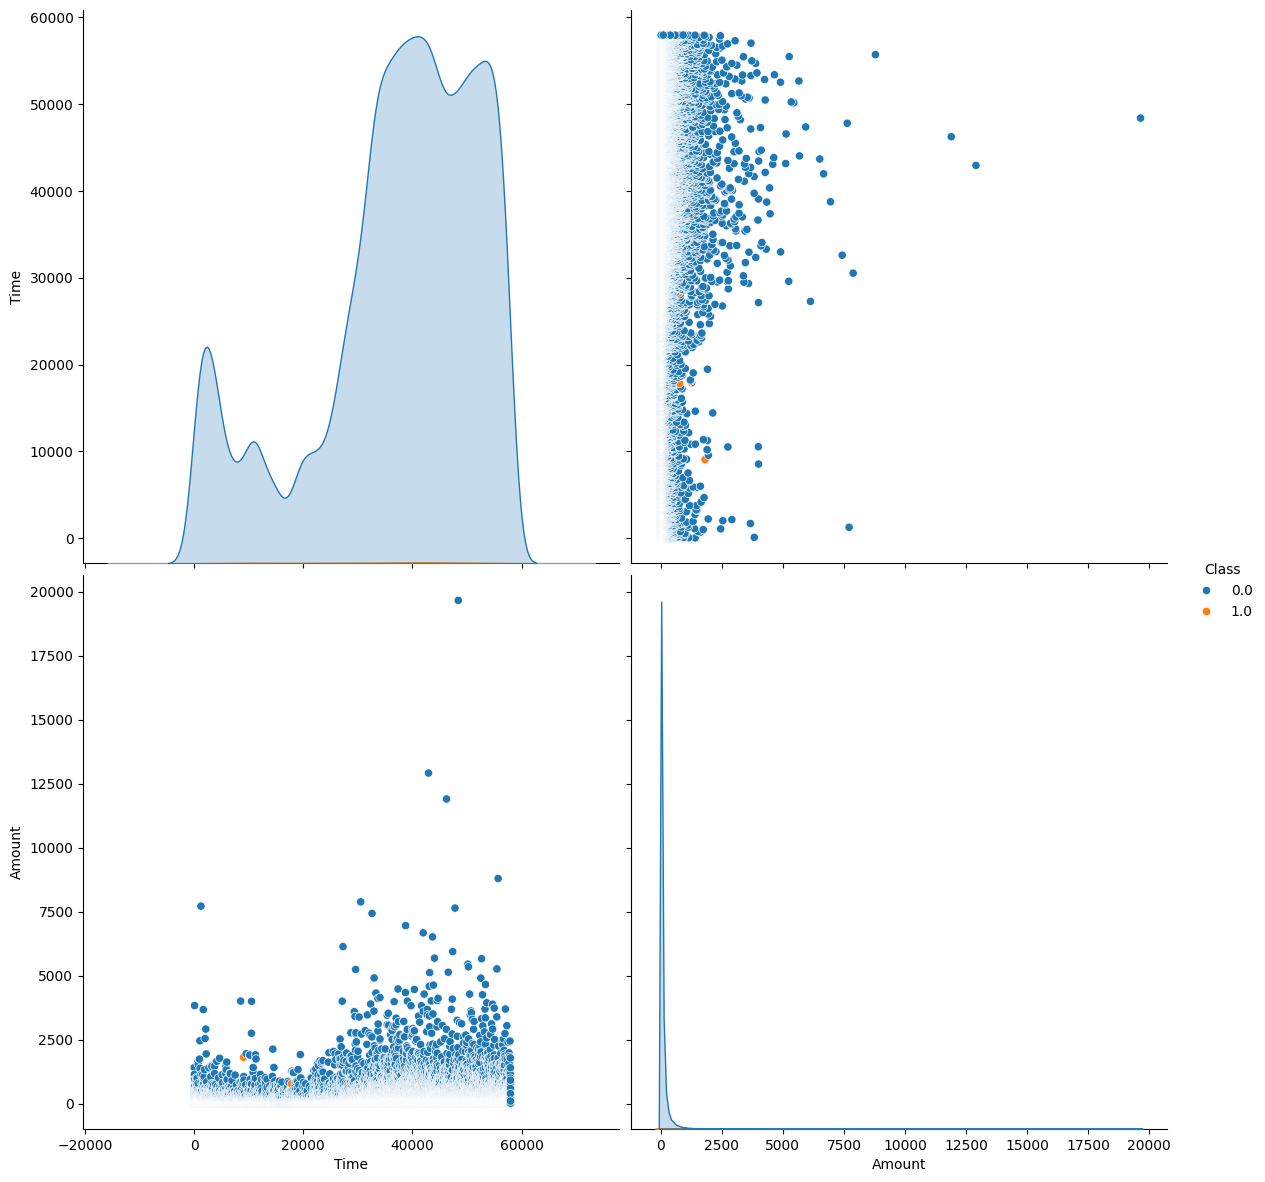

In [21]:
sns.pairplot(df_refine, hue="Class", size=6)
plt.show()

In [22]:
df.Class.value_counts()

,count
Class,
0.0,79126
1.0,191


### What is the relationship between Time and Transactions?

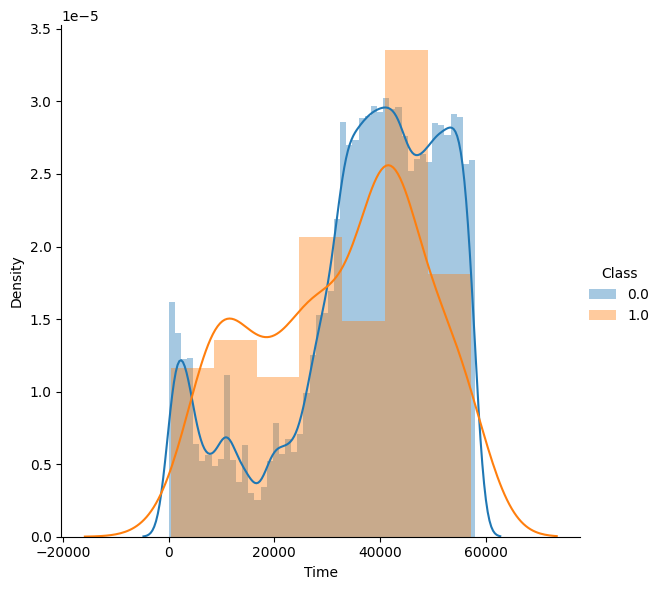

In [26]:
sns.FacetGrid(df_refine, hue="Class", height=6).map(sns.distplot,"Time").add_legend()
plt.show()

### Modelling


<Axes: >

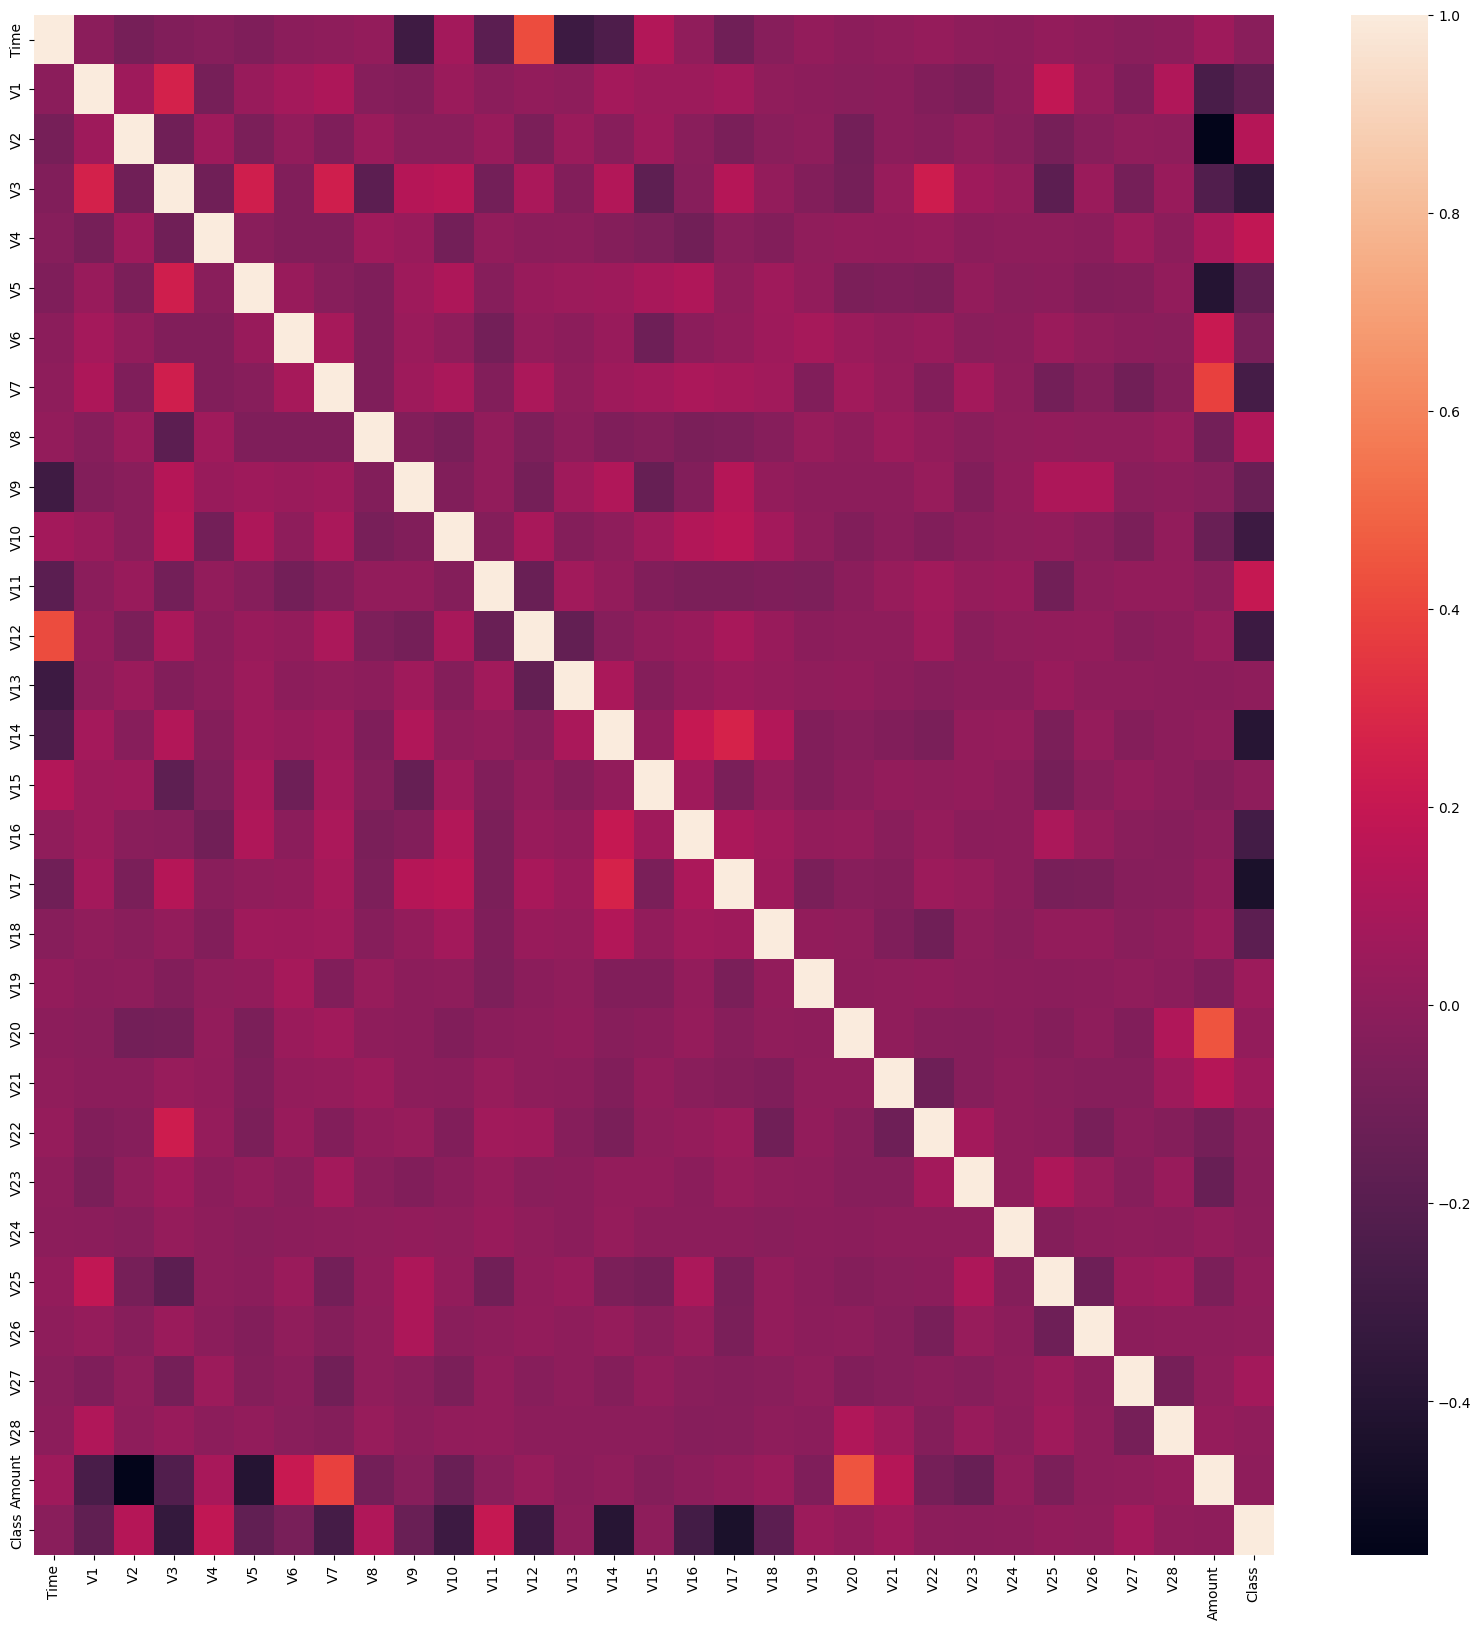

In [27]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

In [29]:
# Create Train and Test Data in ratio 70:30
df_cleaned = df.dropna()
X = df_cleaned.drop(labels='Class', axis=1) # Features
y = df_cleaned.loc[:,'Class']               # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Balancing the fraud and legitimate transactions in data

In [30]:
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [31]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [32]:
mutual_infos.sort_values(ascending=False)

,0
V14,0.572177
V12,0.518476
V10,0.516970
V17,0.516140
V3,0.477455
V4,0.476969
V11,0.466413
V16,0.435941
V7,0.400856
V2,0.370827


<Axes: ylabel='count'>

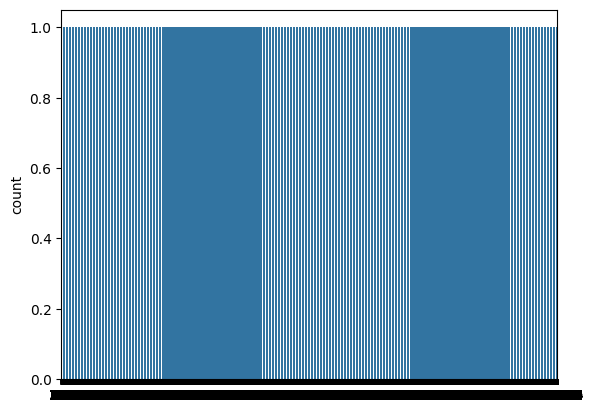

In [33]:
sns.countplot(y_res)

### Evaluation


In [34]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    """
        Method to Compute the best score and parameters computed by grid search
        Parameter:
            grid_clf: The Grid Search Classifier
    """
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)

def evaluation(y_test, grid_clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))

    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))

    print('F1-Score')
    print(f1_score(y_test, y_pred))

    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [35]:
# The parameters of each classifier are different
# Hence, we do not make use of a single method and this is not to violate DRY Principles
# We set pipelines for each classifier unique with parameters
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef, response_method='predict'),
             verbose=1)

In [36]:
grid_eval(grid_sgd)

Best Score 0.9673822631293685
Best Parameter {'model__alpha': np.float64(0.001), 'model__class_weight': None, 'model__loss': 'hinge'}


In [37]:
evaluation(y_test, grid_sgd, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23739
         1.0       0.64      0.88      0.74        57

    accuracy                           1.00     23796
   macro avg       0.82      0.94      0.87     23796
weighted avg       1.00      1.00      1.00     23796

AUC-ROC
0.9380067443979593
F1-Score
0.7407407407407407
Accuracy
0.9985291645654731


In [38]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'),
             verbose=1)

In [39]:
grid_eval(grid_rf)

Best Score 0.9996931350716768
Best Parameter {'model__n_estimators': 75}


In [40]:
evaluation(y_test, grid_rf, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23739
         1.0       0.83      0.88      0.85        57

    accuracy                           1.00     23796
   macro avg       0.92      0.94      0.93     23796
weighted avg       1.00      1.00      1.00     23796

AUC-ROC
0.9383858673601735
F1-Score
0.8547008547008547
Accuracy
0.9992855942175155


In [41]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'),
             verbose=1)

In [42]:
grid_eval(grid_lr)

Best Score 0.9519413776953328
Best Parameter {'model__class_weight': 'balanced', 'model__penalty': 'l2'}


In [43]:
evaluation(y_test, grid_lr, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     23739
         1.0       0.12      0.91      0.22        57

    accuracy                           0.98     23796
   macro avg       0.56      0.95      0.61     23796
weighted avg       1.00      0.98      0.99     23796

AUC-ROC
0.948452579698963
F1-Score
0.21940928270042195
Accuracy
0.9844511682635737


In [44]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'),
             verbose=1)

In [45]:
grid_eval(grid_knn)

Best Score 0.9171832064615261
Best Parameter {'model__p': 2}


In [46]:
evaluation(y_test, grid_knn, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     23739
         1.0       0.03      0.72      0.06        57

    accuracy                           0.95     23796
   macro avg       0.52      0.83      0.52     23796
weighted avg       1.00      0.95      0.97     23796

AUC-ROC
0.8349429431027335
F1-Score
0.06451612903225806
Accuracy
0.9500336190956463
